In [38]:
import numpy as np
import xarray as xr
import os.path as op
from dask.diagnostics import ProgressBar
from scipy.io import loadmat
from scipy.interpolate import PchipInterpolator as pchip
from xmitgcm import open_mdsdataset
from xgcm.grid import Grid
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ddir = '/swot/SUM05/takaya/MITgcm/channel/runs'

In [3]:
ys, dy = (272,5)
dt = 6e2
df = 144
ts = int(360*86400*ys/dt+df)
te = int(360*86400*(ys+dy)/dt+df)
print(ts,te)

14100624 14359824


In [4]:
ds = open_mdsdataset(op.join(ddir,'zerores_10km_PZ'), grid_dir=op.join(ddir,'10km_grid'),
                     iters=range(ts,te,144),
                     prefix=['P1Ptave','P2Ptave','Z1Ptave','Z2Ptave','PPtave'],
                     delta_t=dt
                    )
ds

/home/takaya/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home/takaya/xmitgcm/xmitgcm/mds_store.py:235: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


<xarray.Dataset>
Dimensions:   (XC: 100, XG: 100, YC: 200, YG: 200, Z: 40, Zl: 40, Zp1: 41, Zu: 40, time: 1800)
Coordinates:
  * XC        (XC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 55000.0 ...
  * YC        (YC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 55000.0 ...
  * XG        (XG) >f4 0.0 10000.0 20000.0 30000.0 40000.0 50000.0 60000.0 ...
  * YG        (YG) >f4 0.0 10000.0 20000.0 30000.0 40000.0 50000.0 60000.0 ...
  * Z         (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
  * Zp1       (Zp1) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
  * Zu        (Zu) >f4 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
  * Zl        (Zl) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
    rA        (YC, XC) >f4 dask.array<shape=(200, 100), chunksize=(200, 100)>
    dxG       (YG, XC) >f4 dask.array<shape=(200, 100), chunksize=(200, 100)>
    dyG       (YC, XG) >f4 dask.array<shape=(200, 100), chunksize=(200, 100)>
    Depth     (YC

In [5]:
ds.TRAC22.attrs

OrderedDict([('standard_name', 'TRAC22'),
             ('long_name', 'Phy1 concentration'),
             ('units', 'mM/m^3')])

In [5]:
grid = Grid(ds, periodic=['X'])

In [6]:
ds1 = open_mdsdataset(op.join(ddir,'zerores_10km_Fe'), grid_dir=op.join(ddir,'10km_grid'),
                     iters=range(ts,te,df),
                     prefix=['FeTtave'], delta_t=dt
                    )
ds1

/home/takaya/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home/takaya/xmitgcm/xmitgcm/mds_store.py:235: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


<xarray.Dataset>
Dimensions:   (XC: 100, XG: 100, YC: 200, YG: 200, Z: 40, Zl: 40, Zp1: 41, Zu: 40, time: 1800)
Coordinates:
  * XC        (XC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 55000.0 ...
  * YC        (YC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 55000.0 ...
  * XG        (XG) >f4 0.0 10000.0 20000.0 30000.0 40000.0 50000.0 60000.0 ...
  * YG        (YG) >f4 0.0 10000.0 20000.0 30000.0 40000.0 50000.0 60000.0 ...
  * Z         (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
  * Zp1       (Zp1) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
  * Zu        (Zu) >f4 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
  * Zl        (Zl) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
    rA        (YC, XC) >f4 dask.array<shape=(200, 100), chunksize=(200, 100)>
    dxG       (YG, XC) >f4 dask.array<shape=(200, 100), chunksize=(200, 100)>
    dyG       (YC, XG) >f4 dask.array<shape=(200, 100), chunksize=(200, 100)>
    Depth     (YC

In [7]:
ds2 = open_mdsdataset(op.join(ddir,'zerores_10km_MOMbgc'), grid_dir=op.join(ddir,'10km_grid'),
                     iters=range(ts,te,df),
                     prefix=['MOMtave'],
                     delta_t=dt
                    )
ds2

/home/takaya/xmitgcm/xmitgcm/mds_store.py:721: UserWarning: Couldn't find available_diagnostics.log in /swot/SUM05/takaya/MITgcm/channel/runs/zerores_10km_MOMbgc. Using default version.
  "in %s. Using default version." % data_dir)
/home/takaya/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home/takaya/xmitgcm/xmitgcm/mds_store.py:235: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


<xarray.Dataset>
Dimensions:  (XC: 100, XG: 100, YC: 200, YG: 200, Z: 40, Zl: 40, Zp1: 41, Zu: 40, time: 1800)
Coordinates:
  * XC       (XC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 55000.0 65000.0 ...
  * YC       (YC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 55000.0 65000.0 ...
  * XG       (XG) >f4 0.0 10000.0 20000.0 30000.0 40000.0 50000.0 60000.0 ...
  * YG       (YG) >f4 0.0 10000.0 20000.0 30000.0 40000.0 50000.0 60000.0 ...
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
  * Zp1      (Zp1) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
  * Zu       (Zu) >f4 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
  * Zl       (Zl) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
    rA       (YC, XC) >f4 dask.array<shape=(200, 100), chunksize=(200, 100)>
    dxG      (YG, XC) >f4 dask.array<shape=(200, 100), chunksize=(200, 100)>
    dyG      (YC, XG) >f4 dask.array<shape=(200, 100), chunksize=(200, 100)>
    Depth    

In [37]:
ds2.Z

<xarray.DataArray 'Z' (Z: 40)>
array([   -5. ,   -15. ,   -25. ,   -36. ,   -49. ,   -64. ,   -81.5,  -102. ,
        -126. ,  -154. ,  -187. ,  -226. ,  -272. ,  -327. ,  -393. ,  -471.5,
        -565. ,  -667.5,  -770.5,  -873.5,  -976.5, -1079.5, -1182.5, -1285.5,
       -1388.5, -1491.5, -1594.5, -1697.5, -1800.5, -1903.5, -2006.5, -2109.5,
       -2212.5, -2315.5, -2418.5, -2521.5, -2624.5, -2727.5, -2830.5, -2933.5],
      dtype=float32)
Coordinates:
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
    drF      (Z) >f4 dask.array<shape=(40,), chunksize=(40,)>
    PHrefC   (Z) >f4 dask.array<shape=(40,), chunksize=(40,)>
Attributes:
    standard_name:  depth
    long_name:      vertical coordinate of cell center
    units:          m
    positive:       down
    axis:           Z

In [6]:
P1 = ds.TRAC22
P2 = ds.TRAC23
Z1 = ds.TRAC08
Z2 = ds.TRAC12
PP = ds.PP
# Fe = ds1.TRAC03
# w = ds2.WVEL

In [7]:
P = P1+P2
P

<xarray.DataArray (time: 1800, Z: 40, YC: 200, XC: 100)>
dask.array<shape=(1800, 40, 200, 100), dtype=float32, chunksize=(1, 40, 200, 100)>
Coordinates:
  * XC       (XC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 55000.0 65000.0 ...
  * YC       (YC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 55000.0 65000.0 ...
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
    rA       (YC, XC) >f4 dask.array<shape=(200, 100), chunksize=(200, 100)>
    Depth    (YC, XC) >f4 dask.array<shape=(200, 100), chunksize=(200, 100)>
    drF      (Z) >f4 dask.array<shape=(40,), chunksize=(40,)>
    PHrefC   (Z) >f4 dask.array<shape=(40,), chunksize=(40,)>
    hFacC    (Z, YC, XC) >f4 dask.array<shape=(40, 200, 100), chunksize=(40, 200, 100)>
    iter     (time) int64 dask.array<shape=(1800,), chunksize=(1,)>
  * time     (time) float64 8.46e+09 8.46e+09 8.461e+09 8.461e+09 8.461e+09 ...

In [119]:
P.Z[:14]

<xarray.DataArray 'Z' (Z: 14)>
array([  -5. ,  -15. ,  -25. ,  -36. ,  -49. ,  -64. ,  -81.5, -102. , -126. ,
       -154. , -187. , -226. , -272. , -327. ], dtype=float32)
Coordinates:
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
    drF      (Z) >f4 dask.array<shape=(14,), chunksize=(14,)>
    PHrefC   (Z) >f4 dask.array<shape=(14,), chunksize=(14,)>
Attributes:
    standard_name:  depth
    long_name:      vertical coordinate of cell center
    units:          m
    positive:       down
    axis:           Z

In [120]:
nz = 14
dsave = Fe[:,:nz].to_dataset(name='Fe')
dsave['P1'] = P1[:,:nz]
dsave['P2'] = P2[:,:nz]
dsave['Ptot'] = P[:,:nz]
dsave['PP'] = PP[:,:nz]
dsave.to_netcdf(op.join(ddir,'Iron-and-biomass_%3d-%3dyrs_top300m.nc' % (ys, ys+dy-1)))

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


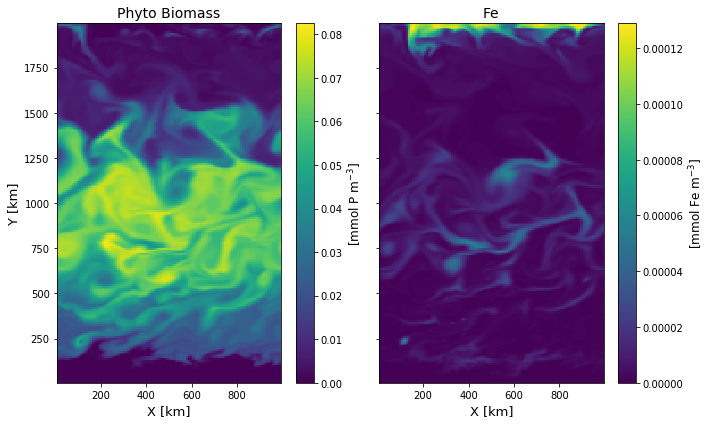

In [127]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,6))
fig.set_tight_layout(True)
im1 = ax1.pcolormesh(P.XC*1e-3, P.YC*1e-3, P[320,0], 
                     rasterized=True)
im2 = ax2.pcolormesh(Fe.XC*1e-3, Fe.YC*1e-3, Fe[320,0], 
                     rasterized=True)
ax2.set_yticklabels([])
ax1.set_ylabel(r"Y [km]", fontsize=13)
ax1.set_xlabel(r"X [km]", fontsize=13)
ax2.set_xlabel(r"X [km]", fontsize=13)
ax1.set_title(r"Phyto Biomass", fontsize=14)
ax2.set_title(r"Fe", fontsize=14)
cbar1 = fig.colorbar(im1, ax=ax1)
cbar2 = fig.colorbar(im2, ax=ax2)
cbar1.set_label(r"[mmol P m$^{-3}$]", fontsize=12)
cbar2.set_label(r"[mmol Fe m$^{-3}$]", fontsize=12)
plt.savefig(op.join(ddir,'Figures/Iron-Biomass_timestep320.pdf'))

In [66]:
months = np.tile(np.repeat(range(12),30),dy)
seas = np.tile(np.repeat(range(4),90),dy)
Fe.coords['months'] = ('time',months)
Fe.coords['seas'] = ('time',seas)
w.coords['months'] = ('time',months)
w.coords['seas'] = ('time',seas)

wbar = w.groupby('seas').mean(['time','XC'])
Febar = Fe.groupby('seas').mean(['time','XC'])
with ProgressBar():
    wp = (w.groupby('seas') - wbar).compute()
    Fep = (Fe.groupby('seas') - Febar).compute()

[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed | 30.3s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100

In [67]:
wpFep = wp*grid.interp(Fep,'Z',boundary='fill')
wpFep

<xarray.DataArray (time: 1800, Zl: 40, YC: 200, XC: 100)>
array([[[[ 0.000000e+00, ...,  0.000000e+00],
         ...,
         [ 3.164595e-13, ...,  3.698257e-13]],

        ...,

        [[ 0.000000e+00, ...,  0.000000e+00],
         ...,
         [-2.156130e-12, ..., -2.556460e-12]]],


       ...,


       [[[ 0.000000e+00, ...,  0.000000e+00],
         ...,
         [ 5.557653e-13, ...,  5.574792e-13]],

        ...,

        [[ 0.000000e+00, ...,  0.000000e+00],
         ...,
         [ 2.359215e-13, ...,  4.323667e-14]]]], dtype=float32)
Coordinates:
  * XC       (XC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 55000.0 65000.0 ...
  * YC       (YC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 55000.0 65000.0 ...
  * Zl       (Zl) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
    rA       (YC, XC) >f4 100000000.0 100000000.0 100000000.0 100000000.0 ...
    Depth    (YC, XC) >f4 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    iter     (time) int64 14100624 14100

In [68]:
wpFep_seas = wpFep.groupby('seas').mean(['time','XC'])
wpFep_seas

<xarray.DataArray (seas: 4, Zl: 40, YC: 200)>
array([[[ 0.000000e+00,  1.016801e-15, ..., -8.430970e-14, -9.713119e-14],
        [ 0.000000e+00,  1.686759e-12, ...,  7.497115e-13,  1.383064e-12],
        ...,
        [ 0.000000e+00,  4.145042e-14, ..., -6.850428e-13, -1.497752e-13],
        [ 0.000000e+00,  5.660078e-14, ..., -6.780430e-13, -1.432589e-13]],

       [[ 0.000000e+00,  3.299370e-15, ..., -2.461578e-13, -2.424476e-13],
        [ 0.000000e+00,  4.255884e-12, ...,  2.731599e-12,  6.921057e-13],
        ...,
        [ 0.000000e+00, -3.923045e-13, ..., -4.296778e-13, -5.144031e-14],
        [ 0.000000e+00, -8.889446e-13, ..., -3.405908e-13, -1.006819e-13]],

       [[ 0.000000e+00, -2.877966e-15, ..., -5.032355e-14, -1.271746e-14],
        [ 0.000000e+00,  2.280504e-12, ...,  2.137524e-12,  7.794007e-12],
        ...,
        [ 0.000000e+00, -2.951404e-14, ..., -9.546108e-14, -2.567426e-14],
        [ 0.000000e+00,  1.036239e-14, ..., -2.734962e-13, -6.320788e-15]],

       [[

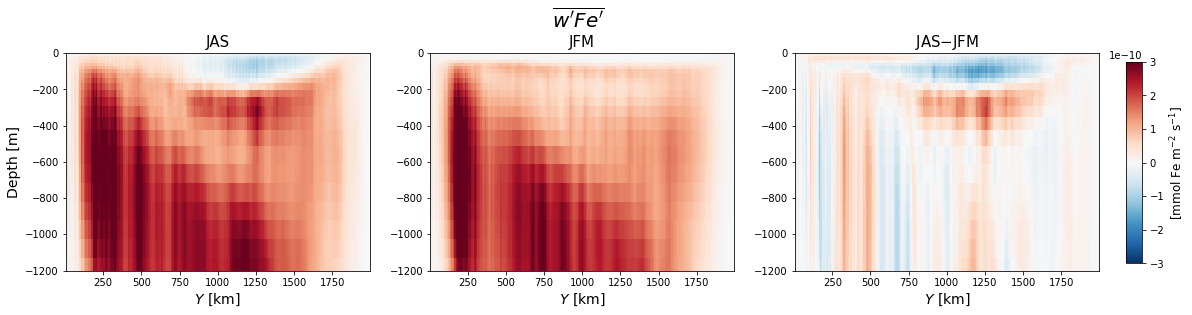

In [49]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(19,4))
# fig.set_tight_layout(True)
im1 = ax1.pcolormesh(ds.YC*1e-3, ds.Zl, wpFep_seas[2], 
                     vmin=-3e-10, vmax=3e-10, cmap='RdBu_r', rasterized=True)
ax2.pcolormesh(ds.YC*1e-3, ds.Zl, wpFep_seas[0],
               vmin=-3e-10, vmax=3e-10, cmap='RdBu_r', rasterized=True)
im3 = ax3.pcolormesh(ds.YC*1e-3, ds.Zl, (wpFep_seas[2]-wpFep_seas[0]), 
                    vmax=3e-10, vmin=-3e-10, cmap='RdBu_r', rasterized=True)
# ax3.plot(MLD_clim.YC*1e-3, -MLD_clim, 'k', lw=2)
# ax3.plot(hbl99.YC*1e-3, -hbl99.mean('time'), 'k--', lw=2)
ax1.set_ylabel(r'Depth [m]', fontsize=14)
ax1.set_xlabel(r'$Y$ [km]', fontsize=14)
ax2.set_xlabel(r'$Y$ [km]', fontsize=14)
ax3.set_xlabel(r'$Y$ [km]', fontsize=14)
ax1.set_ylim([-12e2,0])
ax2.set_ylim([-12e2,0])
ax3.set_ylim([-12e2,0])
ax1.set_title(r"JAS",fontsize=15)
ax2.set_title(r"JFM",fontsize=15)
ax3.set_title(r"JAS$-$JFM",fontsize=15)
# fig.colorbar(im, ax=ax)
# fig.subplots_adjust(hspace=.8)
fig.subplots_adjust(right=0.88)
# fig.subplots_adjust(left=0.138)
# cbar_ax1 = fig.add_axes([0.05, 0.15, 0.012, 0.7])
# cbar1 = fig.colorbar(im1, cax=cbar_ax1)
# cbar1.set_label(r"[mmol Fe m$^{-2}$ s$^{-1}$]", fontsize=12)
cbar_ax3 = fig.add_axes([0.9, 0.15, 0.012, 0.7])
cbar3 = fig.colorbar(im3, cax=cbar_ax3)
cbar3.set_label(r"[mmol Fe m$^{-2}$ s$^{-1}$]", fontsize=12)
fig.suptitle(r"$\overline{w'Fe'}$", fontsize=20, y=1.04)
plt.savefig(op.join(ddir,'Figures/wFe_JAS-JFM.pdf'))

In [16]:
print(P1day.dims, ds.drF.dims, ds.Z.dims)

('days', 'Z', 'YC', 'XC') ('Z',) ('Z',)


In [8]:
P1.coords['days'] = ('time',np.tile(range(360),dy))
P2.coords['days'] = ('time',np.tile(range(360),dy))
Z1.coords['days'] = ('time',np.tile(range(360),dy))
Z2.coords['days'] = ('time',np.tile(range(360),dy))
PP.coords['days'] = ('time',np.tile(range(360),dy))
with ProgressBar():
    P1day = P1.groupby('days').mean(['time']).compute()
    P2day = P2.groupby('days').mean(['time']).compute()
    Z1day = Z1.groupby('days').mean(['time']).compute()
    Z2day = Z2.groupby('days').mean(['time']).compute()
    PPday = PP.groupby('days').mean(['time']).compute()

[########################################] | 100% Completed |  2min 36.5s
[########################################] | 100% Completed |  3min  6.6s
[########################################] | 100% Completed |  3min  2.1s
[########################################] | 100% Completed |  3min  6.5s
[########################################] | 100% Completed |  3min 15.2s


In [186]:
ds.Zl[8]

<xarray.DataArray 'Zl' ()>
array(-113., dtype=float32)
Coordinates:
    Zl       >f4 -113.0
Attributes:
    standard_name:      depth_at_upper_w_location
    long_name:          vertical coordinate of upper cell interface
    units:              m
    positive:           down
    axis:               Z
    c_grid_axis_shift:  -0.5

In [73]:
nz = 8
with ProgressBar():
    P1Cday = (grid.cumsum(P1day*ds.drF,'Z',boundary='fill')[:,nz]
              * np.abs(ds.Zl[nz])**-1*106.*12.).compute()
    P2Cday = (grid.cumsum(P2day*ds.drF,'Z',boundary='fill')[:,nz]
              * np.abs(ds.Zl[nz])**-1*106.*12.).compute()
    Z1Cday = (grid.cumsum(Z1day*ds.drF,'Z',boundary='fill')[:,nz]
              * np.abs(ds.Zl[nz])**-1*106.*12.).compute()
    Z2Cday = (grid.cumsum(Z2day*ds.drF,'Z',boundary='fill')[:,nz]
              * np.abs(ds.Zl[nz])**-1*106.*12.).compute()
    P1Cintg = (P1day*ds.drF).sum('Z').compute()
    P2Cintg = (P2day*ds.drF).sum('Z').compute()
    Z1Cintg = (Z1day*ds.drF).sum('Z').compute()
    Z2Cintg = (Z2day*ds.drF).sum('Z').compute()
PPCday = PPday*106.*12.
P1Cintg

[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  4.0s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  4.4s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  3.9s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  4.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100

<xarray.DataArray (days: 360, YC: 200, XC: 100)>
array([[[0.      , 0.      , ..., 0.      , 0.      ],
        [0.018485, 0.022198, ..., 0.012049, 0.016125],
        ...,
        [0.621122, 0.698927, ..., 0.503756, 0.564834],
        [0.615141, 0.597987, ..., 0.487491, 0.570102]],

       [[0.      , 0.      , ..., 0.      , 0.      ],
        [0.018301, 0.022619, ..., 0.013667, 0.015929],
        ...,
        [0.609509, 0.679373, ..., 0.49421 , 0.556528],
        [0.601303, 0.588295, ..., 0.481949, 0.554656]],

       ...,

       [[0.      , 0.      , ..., 0.      , 0.      ],
        [0.018864, 0.021678, ..., 0.009199, 0.015317],
        ...,
        [0.622417, 0.717851, ..., 0.505619, 0.56385 ],
        [0.645249, 0.643296, ..., 0.496927, 0.591885]],

       [[0.      , 0.      , ..., 0.      , 0.      ],
        [0.018673, 0.021848, ..., 0.010503, 0.015999],
        ...,
        [0.623214, 0.719288, ..., 0.496291, 0.55842 ],
        [0.637404, 0.635586, ..., 0.492455, 0.584285]]]

In [10]:
with ProgressBar():
    Ptot = (P1Cday+P2Cday).sel(YC=slice(6e5,14e5)).compute()
Ptot

<xarray.DataArray (days: 360, YC: 80, XC: 100)>
array([[[11.16238 , 11.422149, ..., 10.896801, 10.979215],
        [11.288904, 11.4886  , ..., 10.907343, 11.052557],
        ...,
        [ 7.319022,  7.22862 , ...,  7.704878,  7.546865],
        [ 7.51031 ,  7.421524, ...,  7.783827,  7.690544]],

       [[10.771447, 10.875952, ..., 10.498232, 10.633448],
        [10.77903 , 10.946081, ..., 10.554409, 10.655589],
        ...,
        [ 7.427702,  7.282979, ...,  7.374281,  7.437976],
        [ 7.675896,  7.490335, ...,  7.354685,  7.566135]],

       ...,

       [[11.714769, 11.794291, ..., 11.830694, 11.812099],
        [11.522915, 11.744486, ..., 11.63772 , 11.510832],
        ...,
        [ 7.598851,  7.89836 , ...,  7.026656,  7.251157],
        [ 7.648623,  7.832764, ...,  7.064783,  7.341306]],

       [[11.546348, 11.488606, ..., 11.517286, 11.536252],
        [11.477493, 11.452842, ..., 11.414235, 11.494884],
        ...,
        [ 6.833045,  7.070616, ...,  7.029407,  6.79372

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


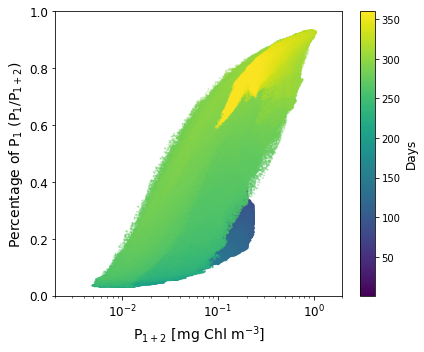

In [66]:
colors = Ptot.days.data[:,np.newaxis,np.newaxis]*np.ones((80,100))+1.

fig, ax = plt.subplots(figsize=(6,5))
fig.set_tight_layout(True)
for i in range(360):
    if i == 0:
        im = ax.scatter((Ptot)[i]*2e-2, (P1Cday.sel(YC=slice(6e5,14e5))/Ptot)[i],
                       c=colors[i], alpha=360./(360.+3*i),
                       s=1., vmin=1., vmax=360., rasterized=True
                       )
    else:
        ax.scatter((Ptot)[i]*2e-2, (P1Cday.sel(YC=slice(6e5,14e5))/Ptot)[i],
                  c=colors[i], alpha=360./(360.+3*i),
                  s=1., vmin=1., vmax=360., rasterized=True
                  )
ax.set_xscale('log')
ax.set_xlim([2e-3,2e0])
ax.set_ylim([0.,1.])
cbar = fig.colorbar(im, ax=ax)
cbar.set_label(r"Days", fontsize=12)
ax.set_xlabel(r"P$_{1+2}$ [mg Chl m$^{-3}$]", fontsize=14)
ax.set_ylabel(r"Percentage of P$_1$ (P$_1$/P$_{1+2}$)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig(op.join(ddir,'Figures/P1vsP_10km.pdf'))

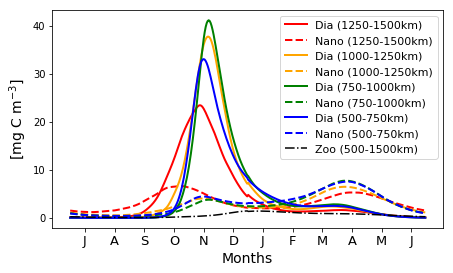

In [142]:
colors = ['r','orange','g','b']
month = ['J','F','M','A','M','J','J','A','S','O','N','D']

fig, ax = plt.subplots(figsize=(7,4))
i = 0
for y in range(150,50,-25):
    ax.plot(range(360), P1Cday.isel(YC=slice(y-25,y)).mean(['YC','XC']).roll(days=-180), 
            ls='-', lw=2, color=colors[i],
            label=r'Dia (%03d-%03dkm)' % ((y-25)*1e1,y*1e1))
    ax.plot(range(360), P2Cday.isel(YC=slice(y-25,y)).mean(['YC','XC']).roll(days=-180).data, 
            ls='--', lw=2, color=colors[i],
            label=r'Nano (%03d-%03dkm)' % ((y-25)*1e1,y*1e1))
    i += 1
ax.plot(range(360), (Z1Cday+Z2Cday).isel(YC=slice(50,150)).mean(['YC','XC']).roll(days=-180), 
        ls='-.', color='k', label=r'Zoo (500-1500km)')
ax.set_xlabel(r"Months", fontsize=14)
ax.set_ylabel(r"[mg C m$^{-3}$]", fontsize=14)
ax.legend(loc='upper right')
ax.set_xticks(np.linspace(15,345,12))
ax.set_xticklabels(np.roll(np.array(month),-6), fontsize=13)
ax.legend(fontsize=11)
plt.savefig(op.join(ddir,'Figures/Phyto_timeseries_10km.pdf'))

In [ ]:
modisdir = '/swot/SUM05/takaya/MODIS/CbPM/'
cbpm = xr.open_dataset(op.join(modisdir,'CbPM_40-70S.nc')).carbon
cbpm

In [ ]:
c_ker = cbpm.sel(lon=slice(100,150))

In [ ]:
cafedir = '/swot/SUM05/takaya/CAFE/'
decaf = loadmat(op.join(cafedir,'CAFE'), appendmat=True)
cafe = decaf['CAFE']
lat = decaf['Lat1']
lon = decaf['Lon1']
ppcb = np.zeros((12,180,360))
for i in range(12):
    ppcb[i] = cafe[:,:,i]

In [ ]:
decaf = xr.DataArray(ppcb, dims=['month','lat','lon'],
                 coords={'month':range(1,13),'lat':lat[:,0],'lon':lon[0,:]}
                 ).to_dataset(name='carbon')
# decaf['lat'] = xr.DataArray(lat, dims=['nLAT','nLON'],
#                         coords={'nLAT':range(180),'nLON':range(360)}
#                         )
# decaf['lon'] = xr.DataArray(lon, dims=['nLAT','nLON'],
#                         coords={'nLAT':range(180),'nLON':range(360)}
#                         )
decaf

In [ ]:
decaf_SO = decaf.sel(lat=slice(-45,-65),lon=slice(50,180))
decaf_SO

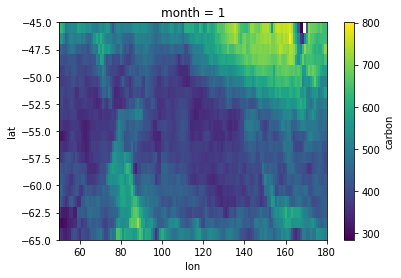

In [143]:
decaf_SO.carbon[0].plot()

In [101]:
P1_intg = (P1*106.*12.*ds.hFacC*ds.drF).sum(dim='Z')
P2_intg = (P2*106.*12.*ds.hFacC*ds.drF).sum(dim='Z')
P1_intg

<xarray.DataArray (time: 1800, YC: 200, XC: 100)>
dask.array<shape=(1800, 200, 100), dtype=float32, chunksize=(1, 200, 100)>
Coordinates:
  * XC       (XC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 55000.0 65000.0 ...
  * YC       (YC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 55000.0 65000.0 ...
    rA       (YC, XC) >f4 dask.array<shape=(200, 100), chunksize=(200, 100)>
    Depth    (YC, XC) >f4 dask.array<shape=(200, 100), chunksize=(200, 100)>
    iter     (time) int64 dask.array<shape=(1800,), chunksize=(1,)>
  * time     (time) float64 8.46e+09 8.46e+09 8.461e+09 8.461e+09 8.461e+09 ...
    days     (time) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


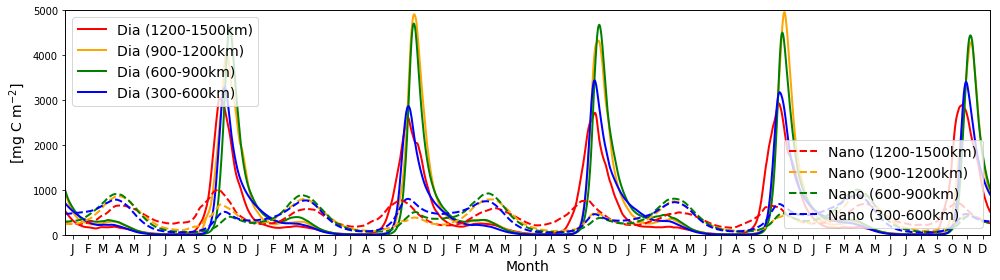

In [137]:
month = np.tile(['J','F','M','A','M','J','J','A','S','O','N','D'],dy)
Ndays = len(P1.time)
# colors = ['g','y','orange','brown','r','m','pink','purple','indigo','b','c','olive']
colors = ['r','orange','g','b']

fig, ax = plt.subplots(figsize=(14,4))
fig.set_tight_layout(True)
ax2 = ax.twinx()
i = 0
for y in range(150,30,-30):
    ax.plot(range(Ndays), P1_intg.isel(YC=slice(y-20,y)).mean(['YC','XC']), lw=2, color=colors[i],
            label=r'Dia (%03d-%03dkm)' % ((y-30)*1e1,y*1e1))
    ax2.plot(range(Ndays), P2_intg.isel(YC=slice(y-20,y)).mean(['YC','XC']), ls='--', lw=2, color=colors[i],
            label=r'Nano (%03d-%03dkm)' % ((y-30)*1e1,y*1e1))
    i += 1
ax.set_xticks(range(15,Ndays,30))
ax.set_xticklabels(month, fontsize=12)
ax.set_xlim([0,Ndays-1])
ax.set_ylim([0,5e3])
ax2.set_ylim([0,5e3])
ax.set_xlabel(r'Month', fontsize=14)
ax.set_ylabel(r'[mg C m$^{-2}$]', fontsize=14)
ax2.set_yticks([])
# ax2.set_ylabel(r'P2 [mol C m$^{-2}$]', fontsize=14)
ax.legend(loc='upper left', fontsize=14)
ax2.legend(loc='lower right', fontsize=14)
# plt.savefig(op.join(mitdir,'../Figures/PhytoBiomass_timeseries.pdf'))

In [17]:
# P_surf = P1_surf + P2_surf
# days = np.tile(range(360),5)
# P_surf.coords['day'] = ('time',days)
# with ProgressBar():
#     P_surf_clim = P_surf.groupby('day').mean('time').compute()
# P_surf_clim

NameError: name 'P1_surf' is not defined

In [ ]:
years = range(2003,2017)
months = np.tile(range(12), len(years))
c_ker.coords['iMONTH'] = ('iTIME', months)

with ProgressBar():
    c_ker_mon = c_ker.groupby('iMONTH').mean('iTIME').compute()
    
c_ker_mon

In [ ]:
c_ker_mon.roll(iMONTH=-6)

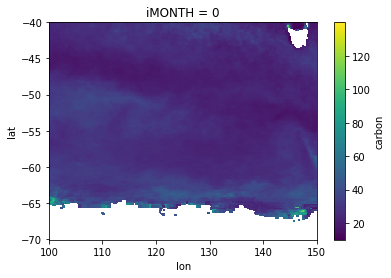

In [22]:
c_ker_mon[0].plot()

In [ ]:
sosedir = '/swot/SUM05/takaya/SOSE'
sose = xr.open_dataset(op.join(sosedir,'3day_ave/bsose_i105_2008to2012_3day_Phyto.nc'))
P_sose = sose.phyto
P_sose.attrs = sose.phyto.attrs
P_sose

In [ ]:
gridSOSE = xr.open_dataset(op.join(sosedir,'3day_ave/grid.nc'))
gridSOSE

In [ ]:
# P_sose = xr.DataArray(P_sose.data[:605], dims={'iTIME','Z','lat','lon'},
#                      coords={'iTIME':range(605),'Z':grid.DRF.data,'lat':grid.YC[:,0].data,'lon':grid.XC[0,:].data,
#                             'DinY':('iTIME',np.tile(range(121),5))}
#                      )
P_sose.coords['iTIME'] = ('iTIME',range(609))
P_sose.coords['iDEPTH'] = ('iDEPTH',gridSOSE.DRF.data)
P_sose.coords['iLAT'] = ('iLAT',gridSOSE.YC.data[:,0])
P_sose.coords['iLON'] = ('iLON',gridSOSE.XC.data[0,:])
P_sose

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


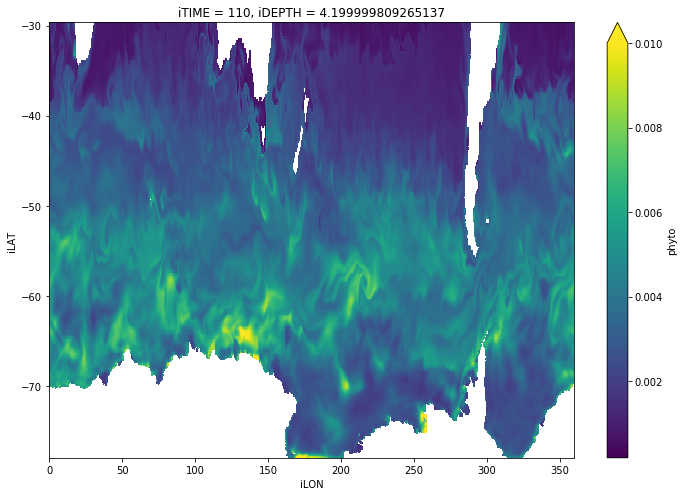

In [93]:
fig, ax = plt.subplots(figsize=(10,7))
fig.set_tight_layout(True)
P_sose[110,0].plot(ax=ax, vmax=1e-2, rasterized=True)
plt.savefig(op.join(sosedir,'SOSE_iTIME115_phyto.pdf'))

In [ ]:
# P_kerintg = (P_sose * grid.DRF.data[np.newaxis,:,np.newaxis,np.newaxis]
#              * grid.hFacC.data[np.newaxis]).sel(iLAT=slice(-65,-45),iLON=slice(100,140)).sum('iDEPTH')
P_kersurf = P_sose[:,0].sel(iLON=slice(100,140))
P_kersurf

In [23]:
DinY = np.tile(range(121),5)
P_kersurf = P_kersurf[:-4]
P_kersurf.coords['DinY'] = ('iTIME',DinY)
P_kersurf = P_kersurf.groupby('DinY').mean('iTIME')

P_kersurf

<xarray.DataArray 'phyto' (DinY: 121, iLAT: 294, iLON: 120)>
array([[[     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan],
        ...,
        [0.0013  , 0.001194, ...,      nan,      nan],
        [0.001096, 0.000994, ...,      nan,      nan]],

       [[     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan],
        ...,
        [0.001263, 0.00114 , ...,      nan,      nan],
        [0.001051, 0.000955, ...,      nan,      nan]],

       ...,

       [[     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan],
        ...,
        [0.001341, 0.001271, ...,      nan,      nan],
        [0.001124, 0.001038, ...,      nan,      nan]],

       [[     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan],
        ...,
        [0.001334, 0.001258, ...,      nan,      nan],
        [0.001124, 0.001037, ...,      nan,

In [119]:
print(PPCday.dims, ds.drF.dims, ds.hFacC.dims)

('days', 'Z', 'YC', 'XC') ('Z',) ('Z', 'YC', 'XC')


In [24]:
PPintg = (PPCday*ds.hFacC*ds.drF).sum(dim='Z')
PPintg

<xarray.DataArray (days: 360, YC: 200, XC: 100)>
dask.array<shape=(360, 200, 100), dtype=float32, chunksize=(360, 200, 100)>
Coordinates:
  * XC       (XC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 55000.0 65000.0 ...
  * YC       (YC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 55000.0 65000.0 ...
    rA       (YC, XC) >f4 100000000.0 100000000.0 100000000.0 100000000.0 ...
    Depth    (YC, XC) >f4 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
  * days     (days) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...

In [25]:
# bl = xr.open_dataset(op.join(ddir,'KPPbl_99percen_10km.nc')).KPPbl
# bl.coords['days'] = ('time',np.tile(range(360),10))
# bl_day = bl.groupby('days').mean(['time'])
# bl_day
MXLD = xr.open_dataarray(op.join(ddir,'MXLD_10km_zonalave.nc'))
MXLD.coords['DinY'] = ('time',np.tile(range(360),5))
MXLD = MXLD.groupby('DinY').mean(['time'])
MXLD

<xarray.DataArray (DinY: 360, YC: 200)>
array([[   0.      , 1507.450512, 1495.954653, ...,   30.      ,   30.      ,
          30.      ],
       [   0.      , 1506.827427, 1501.272156, ...,   30.      ,   30.      ,
          30.      ],
       [   0.      , 1508.855565, 1500.721245, ...,   30.      ,   30.      ,
          30.      ],
       ...,
       [   0.      , 1506.084345, 1506.648719, ...,   30.      ,   30.      ,
          30.      ],
       [   0.      , 1507.548548, 1504.782356, ...,   30.      ,   30.      ,
          30.      ],
       [   0.      , 1513.01608 , 1505.235733, ...,   30.      ,   30.      ,
          30.      ]])
Coordinates:
  * YC       (YC) float32 5000.0 15000.0 25000.0 35000.0 45000.0 55000.0 ...
  * DinY     (DinY) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...

# Behrenfeld balance
$$r = \frac{\ln[C_1]-\ln[C_0]}{t_1-t_0} \sim \mu - l$$

In [49]:
PP.attrs

OrderedDict([('standard_name', 'PP'),
             ('long_name', 'Primary Production'),
             ('units', 'mmol P/m^3/s')])

In [37]:
PintgC = ((P1+P2)*106*12*ds.hFacC*ds.drF).sum(dim='Z')
mu = (PP*106*12*ds.hFacC*ds.drF).sum(dim='Z')
PintgC

<xarray.DataArray (time: 1800, YC: 200, XC: 100)>
dask.array<shape=(1800, 200, 100), dtype=float32, chunksize=(1, 200, 100)>
Coordinates:
  * XC       (XC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 55000.0 65000.0 ...
  * YC       (YC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 55000.0 65000.0 ...
    rA       (YC, XC) >f4 dask.array<shape=(200, 100), chunksize=(200, 100)>
    Depth    (YC, XC) >f4 dask.array<shape=(200, 100), chunksize=(200, 100)>
    iter     (time) int64 dask.array<shape=(1800,), chunksize=(1,)>
  * time     (time) float64 8.46e+09 8.46e+09 8.461e+09 8.461e+09 8.461e+09 ...
    days     (time) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...

In [48]:
r = np.log(PintgC[1:]/PintgC[:-1].data) * PintgC.time.diff('time',1)**-1
tnew = .5*(mu.time.data[1:]+mu.time.data[:-1])
func = pchip(tnew, r, axis=0)
r = xr.DataArray(func(mu.time.data), dims=mu.dims, coords=mu.coords)
r*86400

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/scipy/interpolate/_cubic.py:121: RuntimeWarning: invalid value encountered in greater
  mask2 = (np.sign(m0) != np.sign(m1)) & (np.abs(d) > 3.*np.abs(m0))


<xarray.DataArray (time: 1800, YC: 200, XC: 100)>
array([[[      nan,       nan, ...,       nan,       nan],
        [ 0.083815,  0.0677  , ...,  0.085074,  0.096135],
        ...,
        [-0.059487, -0.036915, ..., -0.059078, -0.063258],
        [-0.08059 , -0.067802, ..., -0.073325, -0.076038]],

       [[      nan,       nan, ...,       nan,       nan],
        [ 0.080907,  0.070491, ...,  0.086758,  0.092562],
        ...,
        [-0.055992, -0.017739, ..., -0.053573, -0.058642],
        [-0.068429, -0.05192 , ..., -0.065052, -0.067082]],

       ...,

       [[      nan,       nan, ...,       nan,       nan],
        [-0.07818 , -0.114073, ..., -0.062273, -0.07388 ],
        ...,
        [ 0.004962,  0.014603, ..., -0.01575 , -0.005471],
        [-0.019852, -0.02825 , ..., -0.011402, -0.016428]],

       [[      nan,       nan, ...,       nan,       nan],
        [-0.078181, -0.114069, ..., -0.061173, -0.071757],
        ...,
        [ 0.004936,  0.014331, ..., -0.024588, -0.008

In [42]:
l = mu - r
r.coords['days'] = ('time',np.tile(range(360),dy))
mu.coords['days'] = ('time',np.tile(range(360),dy))
l.coords['days'] = ('time',np.tile(range(360),dy))
with ProgressBar():
    rday = r.groupby('days').mean('time')
    muday = mu.groupby('days').mean('time')
    lday = l.groupby('days').mean('time')

No handles with labels found to put in legend.


/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


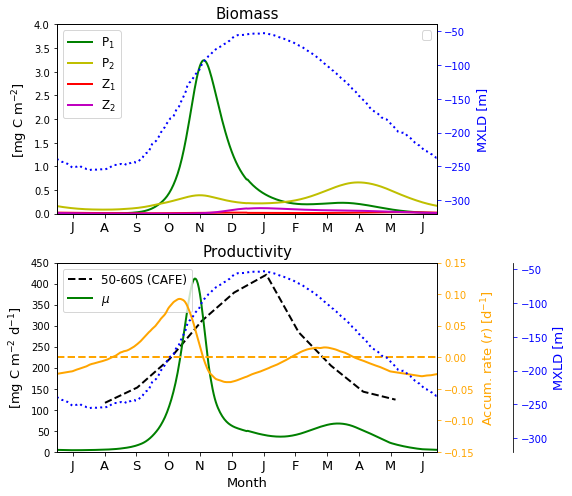

In [76]:
month = ['J','F','M','A','M','J','J','A','S','O','N','D']
colors = ['r','orange','g','b']
nys,nyn = 1e3*np.array([600,1400])

fig, (ax1,ax3) = plt.subplots(nrows=2, ncols=1, figsize=(8,7))
fig.set_tight_layout(True)
ax2 = ax1.twinx()
ax5 = ax1.twinx()
ax4 = ax3.twinx()
ax6 = ax3.twinx()
# ax7 = ax3.twinx()
ax6.spines["right"].set_position(("axes", 1.2))
# make_patch_spines_invisible(ax7)
# ax7.spines["right"].set_visible(True)

# ax2.plot(np.linspace(15,350,12), c_ker_mon.sel(lat=slice(-50,-60)).mean(['lat','lon']).roll(iMONTH=-6), 
#         label=r'50-60S (CbPM)', ls='--', lw=2, color='k')
# ax2.plot(np.linspace(15,350,12), c_ker_mon.sel(lat=slice(-52,-56)).mean(['lat','lon']).roll(iMONTH=-6), 
#         label=r'52-56S (CbPM)', ls='--', lw=2, color=colors[1])
# ax2.plot(np.linspace(15,350,12), c_ker_mon.sel(lat=slice(-56,-60)).mean(['lat','lon']).roll(iMONTH=-6), 
#         label=r'56-60S (CbPM)', ls='--', lw=2, color=colors[2])
# ax2.plot(np.linspace(15,350,12), c_ker_mon.sel(lat=slice(-60,-64)).mean(['lat','lon']).roll(iMONTH=-6), 
#         label=r'60-64S (CbPM)', ls='--', lw=2, color=colors[3])

# i = 0
# for y in range(150,50,-25):
#     ax1.plot(range(360), (P1Cday+P2Cday).isel(YC=slice(y-25,y)).mean(['YC','XC']).roll(days=-180), 
#             lw=2, color=colors[i],
#             label=r'%03d-%03dkm' % ((y-25)*1e1,y*1e1))
#     ax1.plot(range(360), ((P1day+P2day)[:,0]*106.*12.).isel(YC=slice(y-25,y)).mean(['YC','XC']).roll(days=-180), 
#             lw=1, ls=':', color=colors[i])
#     i += 1
ax1.plot(range(360), P1Cintg.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
        'g', lw=2, label=r'P$_1$')
ax1.plot(range(360), P2Cintg.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
        'y', lw=2, label=r'P$_2$')
# ax1.plot(range(360), (P1Cday+P2Cday).sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#         'g', lw=1, ls=':', label=r'P$_{1+2}$ (surf)')
ax1.plot(range(360), Z1Cintg.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
        'r', lw=2, label=r'Z$_1$')
ax1.plot(range(360), Z2Cintg.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
        'm', lw=2, label=r'Z$_2$')
    
# ax1.plot(range(360), (P1Cday+P2Cday+Z1Cday+Z2Cday).isel(YC=slice(50,150)).mean(['YC','XC']).roll(days=-180), 
#         lw=2, color='k', label='mean')
ax5.plot(range(360), -MXLD.sel(YC=slice(nys,nyn)).mean(['YC']).roll(DinY=-180), 
        ls=':', lw=2, color='b')

# ax2.plot(np.linspace(1,363,len(P_kersurf.DinY)), 
#         (P_kersurf.roll(DinY=-60)*1e3*12.).sel(iLAT=slice(-60,-50)).mean(['iLAT','iLON']), 
#         'k-.', label='50-60S (SOSE)')

ax1.set_xticks(np.linspace(15,345,12))
ax1.set_xticklabels(np.roll(np.array(month),-6), fontsize=13)
# ax.set_xlim([0,Ndays-1])
ax1.set_ylim([0.,4.])
ax1.set_xlim([0.,359])
ax2.set_ylim([0.,4.])
ax2.set_yticks([])
# ax1.set_xlabel(r'Month', fontsize=13)
ax5.set_ylabel('MXLD [m]', color='b', fontsize=13)
ax5.tick_params('y', colors='b')
ax5.set_ylim([-320,-40])
ax1.set_title(r"Biomass", fontsize=15)
ax1.set_ylabel(r'[mg C m$^{-2}$]', fontsize=13)
ax1.legend(loc='upper left', fontsize=12)
ax2.legend(loc='upper right', fontsize=12)


ax3.plot(np.linspace(15,350,12), decaf_SO.sel(lat=slice(-50,-60)).carbon.mean(['lat','lon']).roll(month=-6), 
        label=r'50-60S (CAFE)', ls='--', lw=2, color='k')
# ax4.plot(np.linspace(15,350,12), decaf_SO.sel(lat=slice(-52,-56)).carbon.mean(['lat','lon']).roll(month=-6), 
#         label=r'52-56S (CAFE)', ls='--', lw=2, color=colors[1])
# ax4.plot(np.linspace(15,350,12), decaf_SO.sel(lat=slice(-56,-60)).carbon.mean(['lat','lon']).roll(month=-6), 
#         label=r'56-60S (CAFE)', ls='--', lw=2, color=colors[2])
# ax4.plot(np.linspace(15,350,12), decaf_SO.sel(lat=slice(-60,-64)).carbon.mean(['lat','lon']).roll(month=-6), 
#         label=r'60-64S (CAFE)', ls='--', lw=2, color=colors[3])

# i = 0
# for y in range(150,50,-25):
#     ax3.plot(range(360), (PPintg*86400).sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#             lw=2, color=colors[i])
#     i += 1
ax3.plot(range(360), (PPintg*86400).sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
        lw=2, color='g', label=r'$\mu$')
ax4.plot(range(360), (rday*86400).sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
        lw=2, color='orange')
ax4.plot(range(360), np.zeros(360), ls='--',
        lw=2, color='orange')
ax6.plot(range(360), -MXLD.sel(YC=slice(nys,nyn)).mean(['YC']).roll(DinY=-180), 
        ls=':', lw=2, color='b')

# ax3.plot(range(360), -(lday*86400).sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#         lw=2, color='r', label=r'$l$')

ax3.set_xticks(np.linspace(15,345,12))
ax3.set_xticklabels(np.roll(np.array(month),-6), fontsize=13)
# ax.set_xlim([0,Ndays-1])
ax3.set_ylim([0.,450])
ax3.set_xlim([0.,359])
# ax4.set_ylim([-5e2,5e2])
# ax4.set_yticks([])
ax3.set_xlabel(r'Month', fontsize=13)
ax4.set_ylabel('Accum. rate ($r$) [d$^{-1}$]', color='orange', fontsize=13)
ax4.tick_params('y', colors='orange')
ax4.set_ylim([-0.15,0.15])
ax6.set_ylabel('MXLD [m]', color='b', fontsize=13)
ax6.tick_params('y', colors='b')
ax6.set_ylim([-320,-40])
ax3.set_title(r"Productivity", fontsize=15)
ax3.set_ylabel(r'[mg C m$^{-2}$ d$^{-1}$]', fontsize=13)
ax3.legend(loc='upper left', fontsize=12)
# ax4.legend(loc='upper right', fontsize=12)
# plt.savefig(op.join(ddir,'Figures/Biomass_CompareWithObs_10km.pdf'))

In [81]:
(30*86400)/4e1

64800.0